In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [4]:
df = pd.read_csv(r"C:\Users\Shrikant\OneDrive\Desktop\Black_Friday Project\blackFriday_train.csv")
df.tail(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550062,1006032,P00372445,M,46-50,7,A,3,0,20,NaN,NaN,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


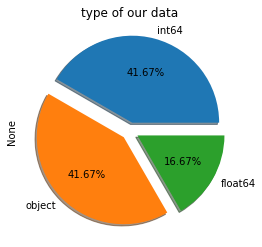

In [6]:
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');


In [7]:
for i in df.columns:
    a = df[i].isna().sum()
    if a > 0:
        print(i,'column has',a,'NaN values')

Product_Category_2 column has 173638 NaN values
Product_Category_3 column has 383247 NaN values


In [8]:
for i in df.columns:
    a=df[i].value_counts()
    b=len(a.index)
    print(i,'column has',b,'categorical data counts\n')
    

User_ID column has 5891 categorical data counts

Product_ID column has 3631 categorical data counts

Gender column has 2 categorical data counts

Age column has 7 categorical data counts

Occupation column has 21 categorical data counts

City_Category column has 3 categorical data counts

Stay_In_Current_City_Years column has 5 categorical data counts

Marital_Status column has 2 categorical data counts

Product_Category_1 column has 20 categorical data counts

Product_Category_2 column has 17 categorical data counts

Product_Category_3 column has 15 categorical data counts

Purchase column has 18105 categorical data counts



In [9]:
df.describe(include='all')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


### A basic observation is that:

  Product P00265242 is the most popular product.
  Most of the transactions were made by men.
  Age group with most transactions was 26-35.
  City Category with most transactions was B

### Their are lot amount of nan values present in columns (Product_Category_2 and Product_Category_3) need to replace it


In [10]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [11]:
df.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
#need to replace nan values
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [13]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.0,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.0,NaN,365


In [14]:
df.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

### we should drop  Product_Category_3 because 68% values are missing

In [15]:
df=df.drop('Product_Category_3',axis=1)

In [16]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.0,365


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


###  All nan values have been replaced



### we can drop user id and product id columns as it has no relation with target

In [18]:
columns = []
for i in df.columns:
    if df[i].dtypes=='object':
        columns.append(i)
print('Below Columns have object datatype which needs to be converted to Int\n\n',columns)

Below Columns have object datatype which needs to be converted to Int

 ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [20]:
df = df.drop(['Product_ID','User_ID'],axis=1)

In [21]:
x = df.drop(['Purchase'],axis=1)
y = df['Purchase']

In [22]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,9.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,9.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368
550064,F,26-35,1,C,3,0,20,9.0,371
550065,F,26-35,15,B,4+,1,20,9.0,137
550066,F,55+,1,C,2,0,20,9.0,365


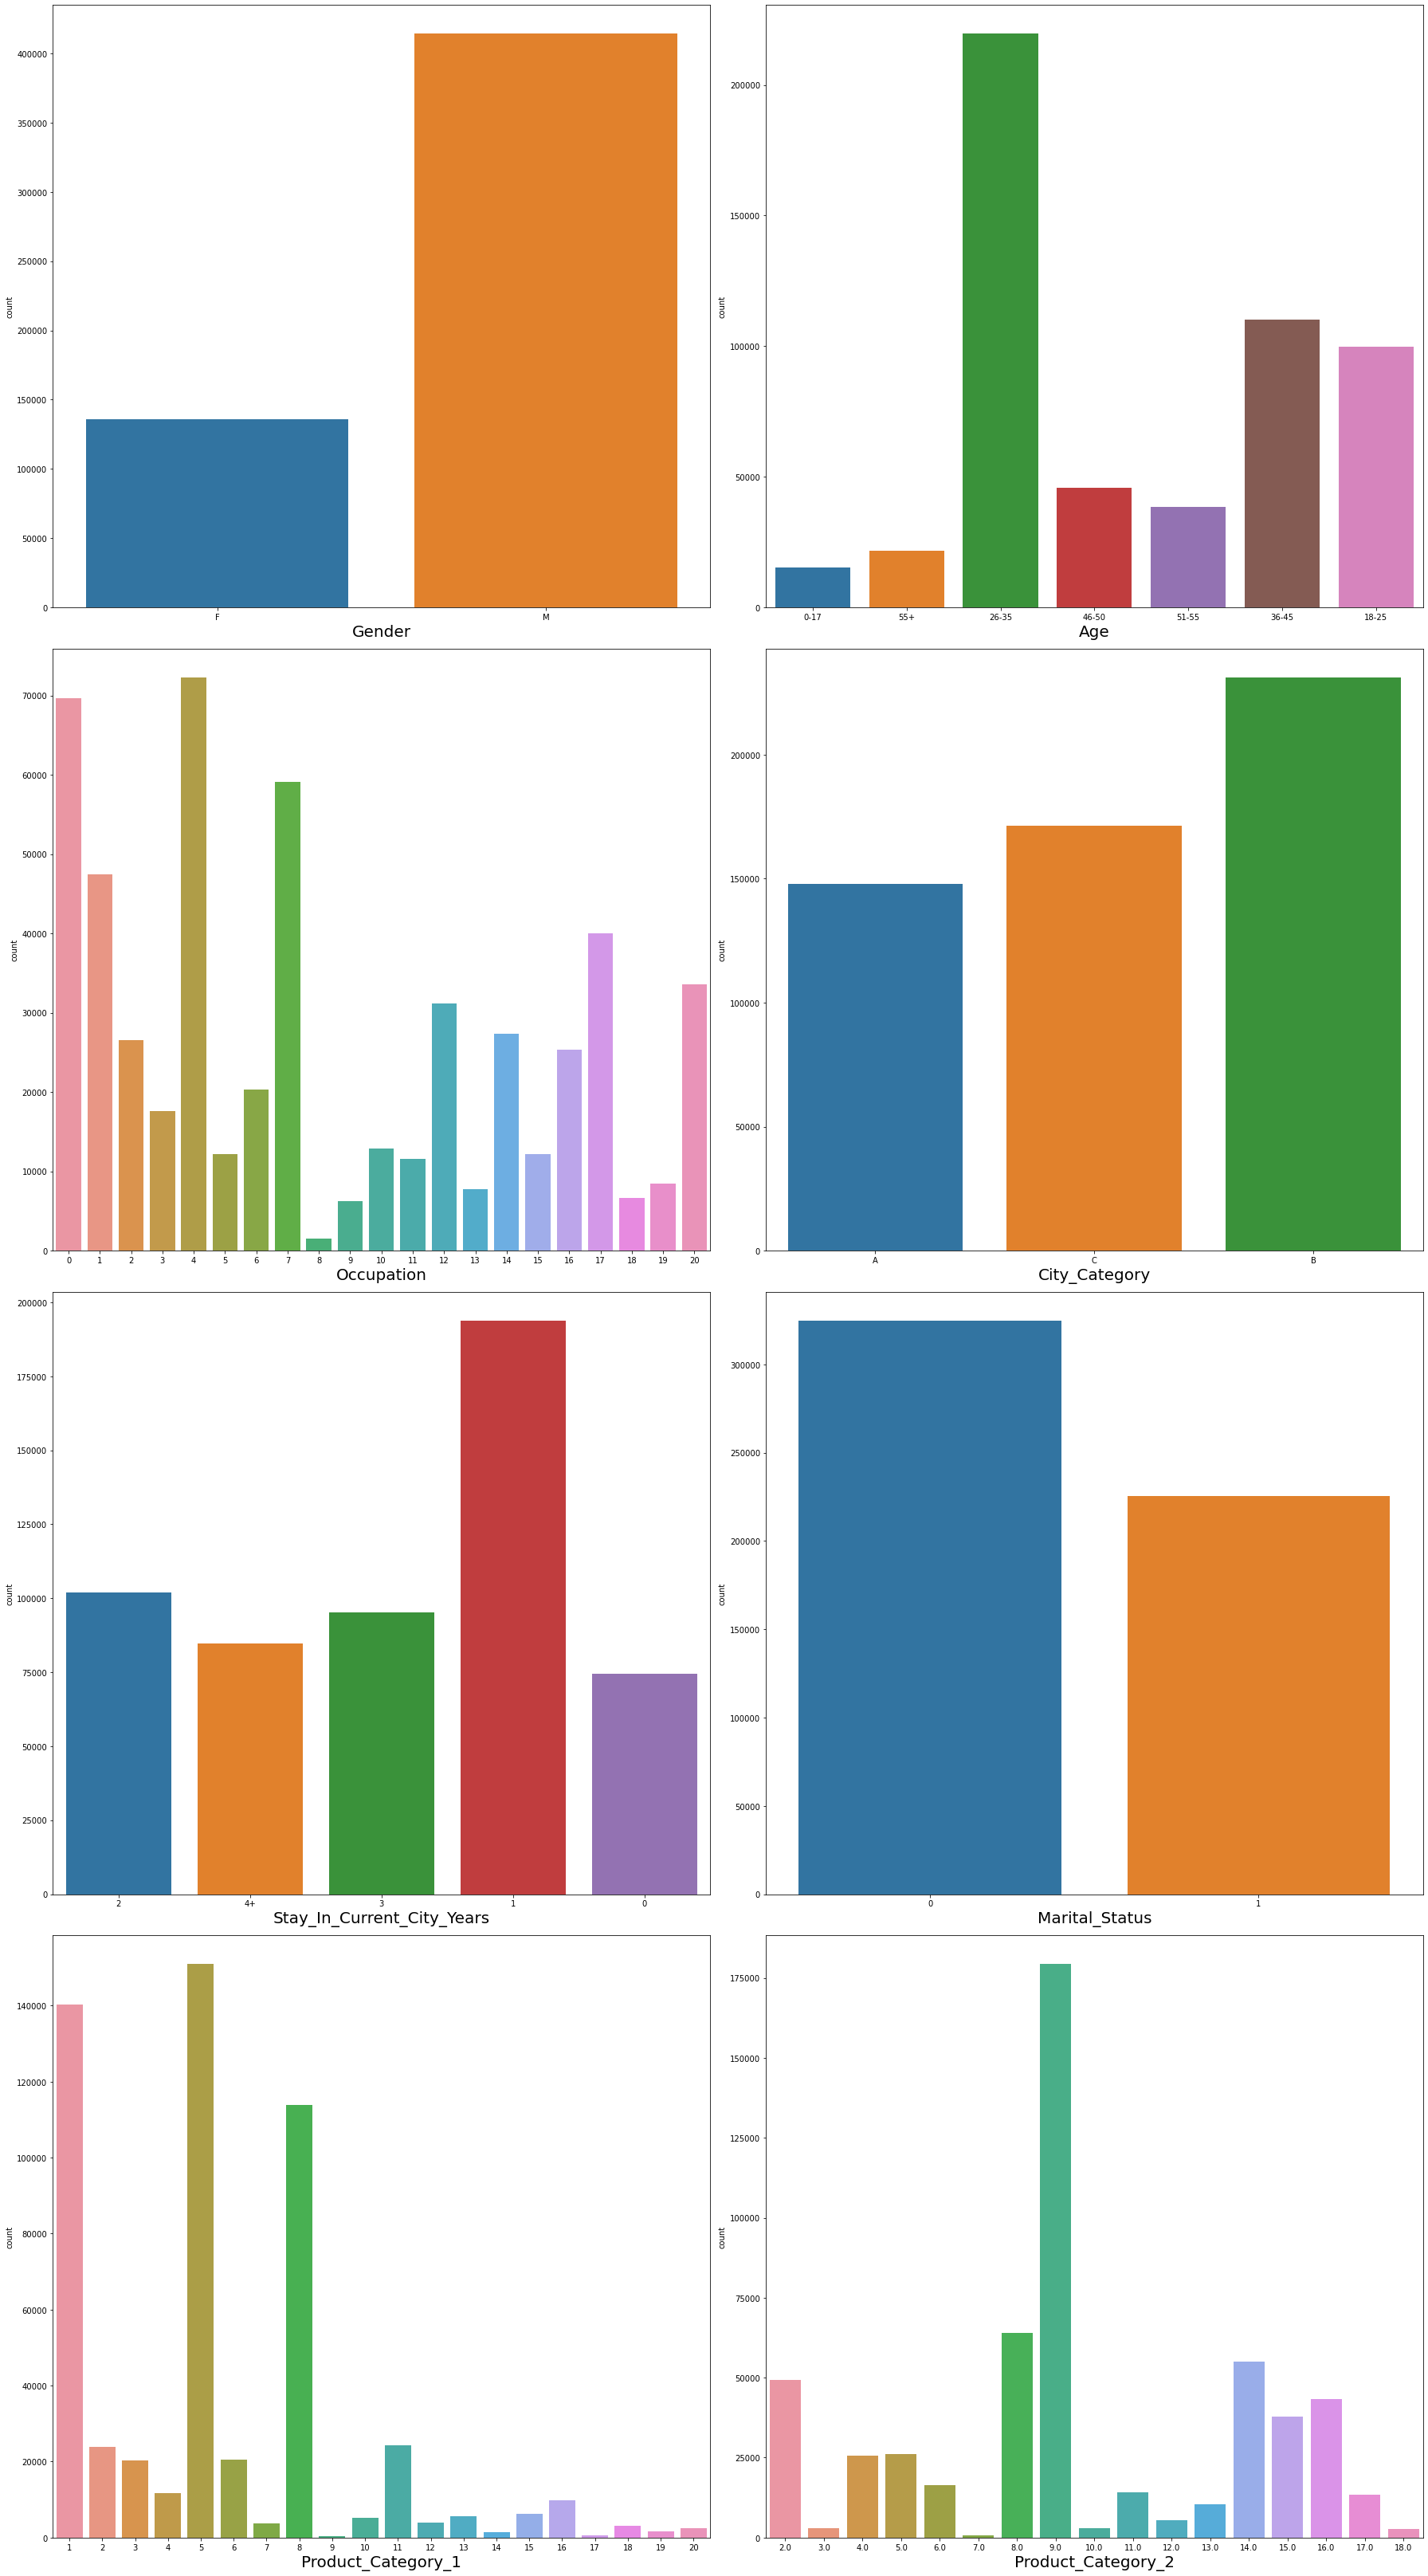

In [23]:
plt.figure(figsize=(25,45), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(4,2,plotno)
        sns.countplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

In [25]:
df.skew()

Occupation            0.400140
Marital_Status        0.367437
Product_Category_1    1.025735
Product_Category_2   -0.007714
Purchase              0.600140
dtype: float64

### Based on the values you have provided, it appears that the variables Occupation, Marital_Status, and Purchase are positively skewed, while Product_Category_1 is highly positively skewed. Product_Category_2 appears to be approximately symmetric, as its skewness value is close to zero.

In [38]:
df.corrwith(df.Purchase)

Gender                        0.060346
Age                           0.015839
Occupation                    0.020833
City_Category                 0.061914
Stay_In_Current_City_Years    0.005422
Marital_Status               -0.000463
Product_Category_1           -0.343703
Product_Category_2           -0.156676
Purchase                      1.000000
dtype: float64

### Product_Category_1 and Product_Category_2
This indicates a moderate positive correlation between these two variables.

In [39]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [41]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0.0,0.0,10,0.0,2.0,0,3,9.0,8370
1,0.0,0.0,10,0.0,2.0,0,1,6.0,15200
2,0.0,0.0,10,0.0,2.0,0,12,9.0,1422
3,0.0,0.0,10,0.0,2.0,0,12,14.0,1057
4,1.0,6.0,16,2.0,4.0,0,8,9.0,7969
...,...,...,...,...,...,...,...,...,...
550063,1.0,5.0,13,1.0,1.0,1,20,9.0,368
550064,0.0,2.0,1,2.0,3.0,0,20,9.0,371
550065,0.0,2.0,15,1.0,4.0,1,20,9.0,137
550066,0.0,6.0,1,2.0,2.0,0,20,9.0,365


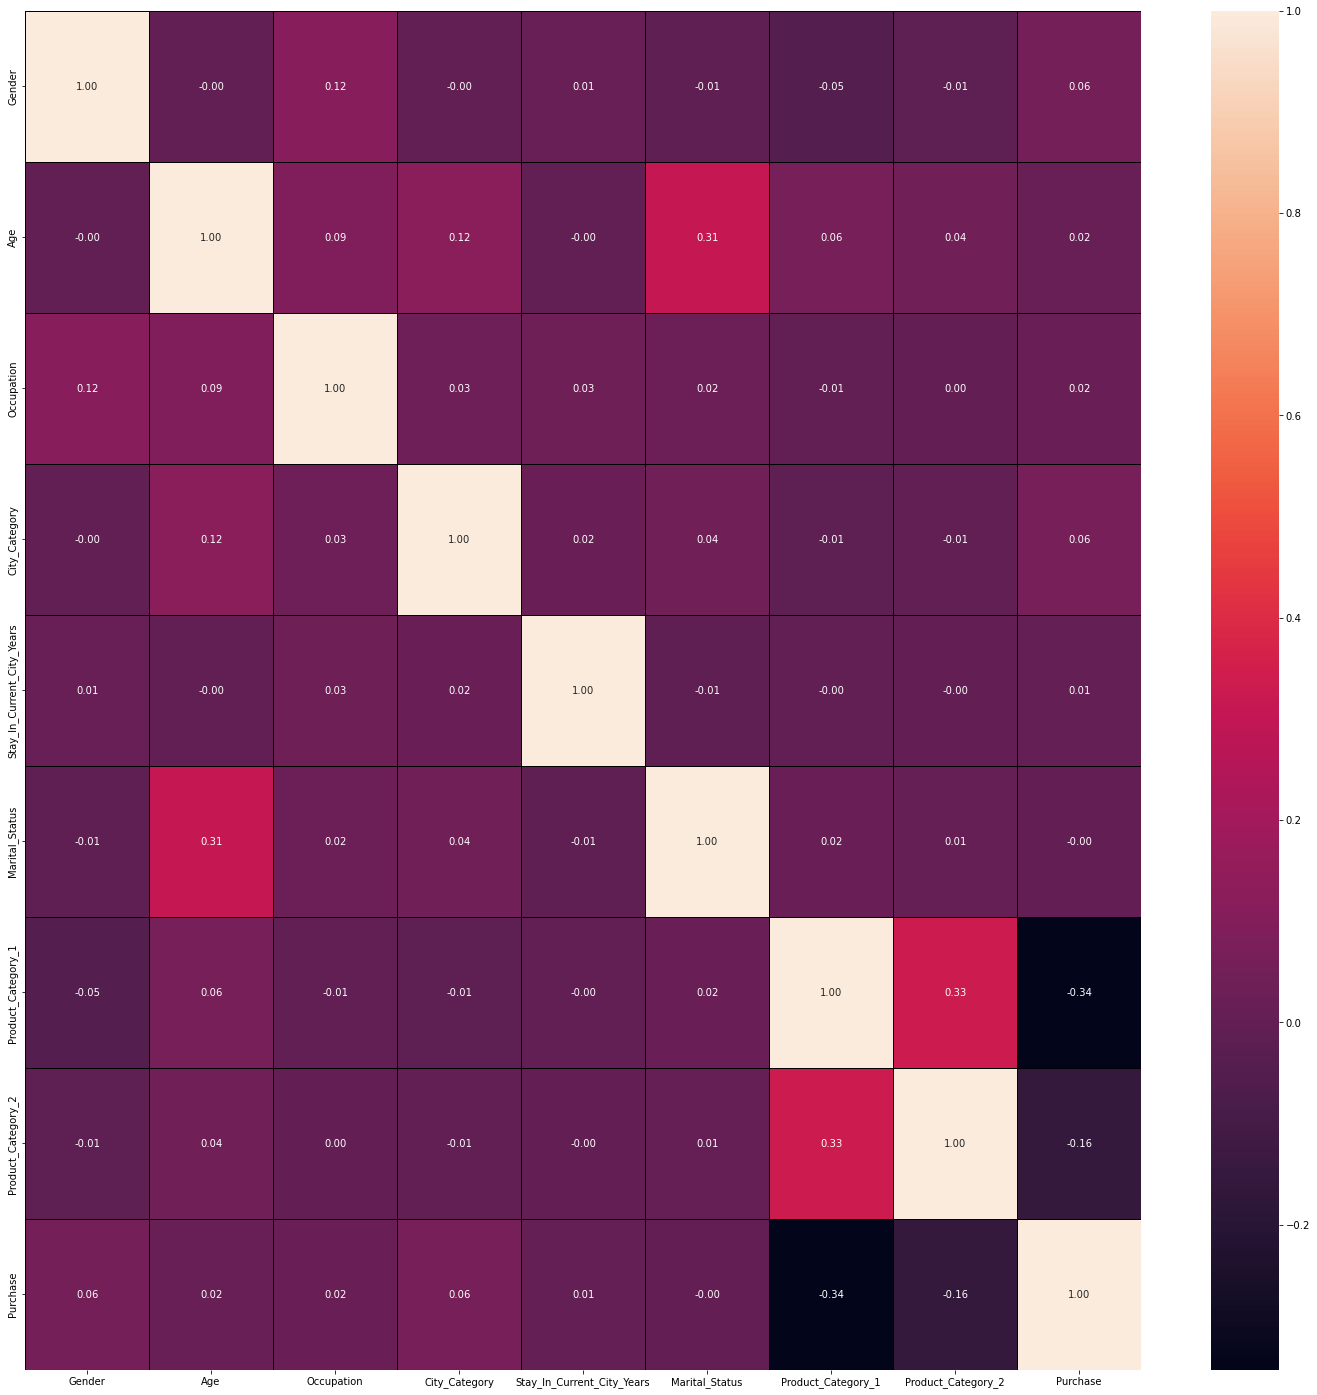

In [42]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()